#### Loading Required Libraries

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import matplotlib.cbook
import seaborn as sns
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from IPython.display import set_matplotlib_formats
import numpy as np
from matplotlib import rcParams

#### Loading Files

In [7]:
#Step 1:  Load data into the dataframe
costcodf  = pd.read_csv("costcos-geocoded.csv")
print(costcodf.head())
ppgdf  = pd.read_csv("ppg2008.csv", index_col=0)
print(ppgdf.head())
ppgdf.rename(columns={'Name  ':'Name'}, inplace=True)

                     Address        City    State    Zip Code   Latitude  \
0   1205 N. Memorial Parkway  Huntsville  Alabama  35801-5930  34.743095   
1       3650 Galleria Circle      Hoover  Alabama  35244-2346  33.377649   
2     8251 Eastchase Parkway  Montgomery  Alabama       36117  32.363889   
3  5225 Commercial Boulevard      Juneau   Alaska  99801-7210  58.359200   
4       330 West Dimond Blvd   Anchorage   Alaska  99515-1950  61.143266   

    Longitude  
0  -86.600955  
1  -86.812420  
2  -86.150884  
3 -134.483000  
4 -149.884217  
                G   MIN   PTS   FGM   FGA    FGP  FTM  FTA    FTP  3PM  3PA  \
Name                                                                          
Dwyane Wade    79  38.6  30.2  10.8  22.0  0.491  7.5  9.8  0.765  1.1  3.5   
LeBron James   81  37.7  28.4   9.7  19.9  0.489  7.3  9.4  0.780  1.6  4.7   
Kobe Bryant    82  36.2  26.8   9.8  20.9  0.467  5.9  6.9  0.856  1.4  4.1   
Dirk Nowitzki  81  37.7  25.9   9.6  20.0  0.479  6.

#### Heat Maps

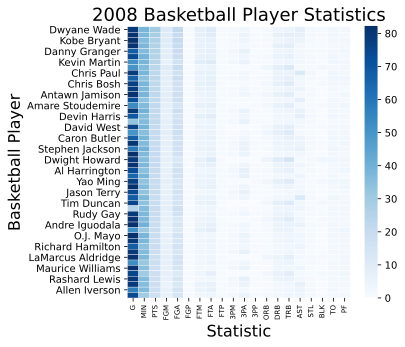

In [8]:
# Heat maps
sns.heatmap(ppgdf, cmap='Blues', linewidths=0.30)
plt.xticks(rotation=90)
plt.xticks(fontsize=7)
plt.xlabel("Statistic", size=16)
plt.ylabel("Basketball Player", size=16)
plt.title("2008 Basketball Player Statistics", size=18)
plt.show()

#### Spatial charts

In [9]:
import folium
folium.Map()
costcodf = costcodf.iloc[0:418, :]
map_it = folium.Map(location=[48, -102], zoom_start = 3)
locations = folium.map.FeatureGroup()
for lat, lng in zip(costcodf.Latitude, costcodf.Longitude):
    locations.add_child(
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    color='yellow',
    fill=True,
    fill_color='blue',
    fill_opacity=0.6))
map_it.add_child(locations)

#### Contour Plot

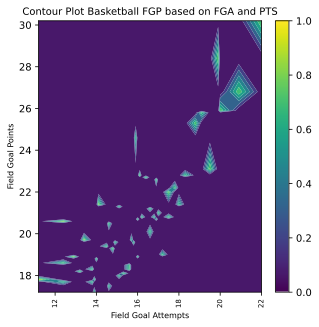

In [10]:
in_num = np.nan

Z = ppgdf.pivot_table(index='FGA', columns='PTS', values='FGP').T.values
X_unique = np.sort(ppgdf.FGA.unique())
Y_unique = np.sort(ppgdf.PTS.unique())

X, Y = np.meshgrid(X_unique, Y_unique)
Z[np.isnan(Z)] = 0
pd.DataFrame(Z).round(3)
pd.DataFrame(X).round(3)
pd.DataFrame(Y).round(3)
set_matplotlib_formats('svg')
# Initialize plot objects
rcParams['figure.figsize'] = 5, 5 # sets plot size
fig = plt.figure()
ax = fig.add_subplot(111)

# Generate a contour plot
cp = ax.contourf(X, Y, Z)
ax=plt.gca() #get the current axes
PCM=ax.get_children()[2] #get the mappable, the 1st and the 2nd are the x and y axes
plt.colorbar(PCM, ax=ax)

plt.xticks(rotation=90)
plt.xticks(fontsize=7)
plt.xlabel("Field Goal Attempts", size=8)
plt.ylabel("Field Goal Points", size=8)
plt.title("Contour Plot Basketball FGP based on FGA and PTS", size=10)
plt.show()